In [1]:
%matplotlib inline

In [2]:
from sqlalchemy.ext.automap import automap_base

In [3]:
import sqlalchemy
import pathlib
import datetime as dt
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import matplotlib.pyplot as plt

sqlite_path= pathlib.Path("Resources/hawaii.sqlite")

In [4]:
engine = create_engine(f"sqlite:///{sqlite_path}")

In [5]:
Base = automap_base()

In [6]:
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurement', 'station']

In [8]:
measurement = Base.classes.measurement

In [9]:
session = Session(engine)

In [10]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x270ddbe8b88>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
query_date = dt.date(2016,8,23) + dt.timedelta(days=365)
print("Query Date:", query_date)

Query Date: 2017-08-23


In [30]:
results= session.query(measurement.date, measurement.prcp).\
            filter(measurement.date.between('2016-08-23','2017-08-23')).all()
            

In [31]:
results2= session.query(measurement.date, measurement.prcp).\
            filter(measurement.date.between('2016-08-23','2017-08-23')).\
            filter(measurement.station == 'USC00519281').all()

In [32]:
results2

[('2016-08-23', 1.79),
 ('2016-08-24', 2.15),
 ('2016-08-25', 0.06),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.6),
 ('2016-08-29', 0.35),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.24),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.01),
 ('2016-09-03', 0.12),
 ('2016-09-04', 0.14),
 ('2016-09-05', 0.03),
 ('2016-09-06', 0.11),
 ('2016-09-07', 0.16),
 ('2016-09-08', 0.07),
 ('2016-09-09', 0.16),
 ('2016-09-10', 0.09),
 ('2016-09-11', 0.3),
 ('2016-09-12', 0.31),
 ('2016-09-13', 0.34),
 ('2016-09-14', 2.33),
 ('2016-09-15', 0.83),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.07),
 ('2016-09-19', 0.01),
 ('2016-09-20', 0.22),
 ('2016-09-21', 0.07),
 ('2016-09-22', 0.34),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.01),
 ('2016-09-25', 0.03),
 ('2016-09-26', 0.17),
 ('2016-09-27', 0.17),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.59),
 ('2016-09-30', 0.25),
 ('2016-10-01', 0.14),
 ('2016-10-02', 0.06),
 ('2016-10-03', 0.16),
 ('2016-10-04', 0.03),
 ('2016-10-05',

AttributeError: 'DataFrame' object has no attribute 'set_xlabel'

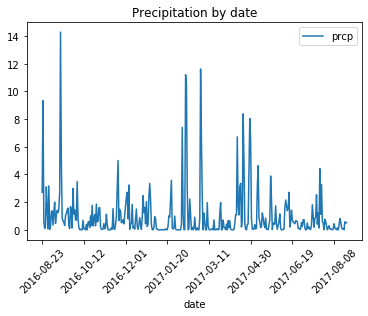

In [20]:
prcp_df = pd.DataFrame(results, columns=['date', 'prcp'])
prcp_df= prcp_df.reset_index(drop=True)
prcp_df = prcp_df.groupby("date").sum()
prcp_df.plot(rot=45,title ="Precipitation by date",legend=True)
prcp_df.set_xlabel("Date")
prcp_df.set_ylabel("precipitation")

In [22]:
prcp_df.describe()

,prcp
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


In [24]:
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [25]:
station = Base.classes.station

In [26]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [27]:

sel = [measurement.station]
count = (session.query(*sel, func.count())
    .group_by(measurement.station)
    .order_by(func.count().desc()).all())
count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
count_df = pd.DataFrame(count, columns=['station', 'count'])
count_df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [30]:
results_2= session.query(measurement.date, measurement.tobs).\
            filter(measurement.date.between('2016-08-23','2017-08-23')).all()
            

In [33]:
temp_df= pd.DataFrame(results_2, columns=['date', 'temperature'])
temp_df

,date,temperature
0,2016-08-23,81.0
1,2016-08-24,79.0
2,2016-08-25,80.0
3,2016-08-26,79.0
4,2016-08-27,77.0
...,...,...
2225,2017-08-19,71.0
2226,2017-08-20,78.0
2227,2017-08-21,76.0
2228,2017-08-22,76.0


In [34]:
temperature = temp_df[['temperature']]

Text(0, 0.5, 'Frequency')

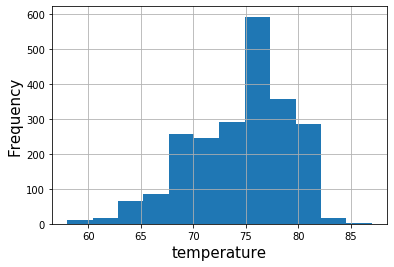

In [38]:
temp_df['temperature'].hist(bins=12)
plt.xlabel("temperature", fontsize=15)
plt.ylabel("Frequency",fontsize=15)